# Data visualisation

### Libraries

In [167]:
import TFIDF
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

### Histogram


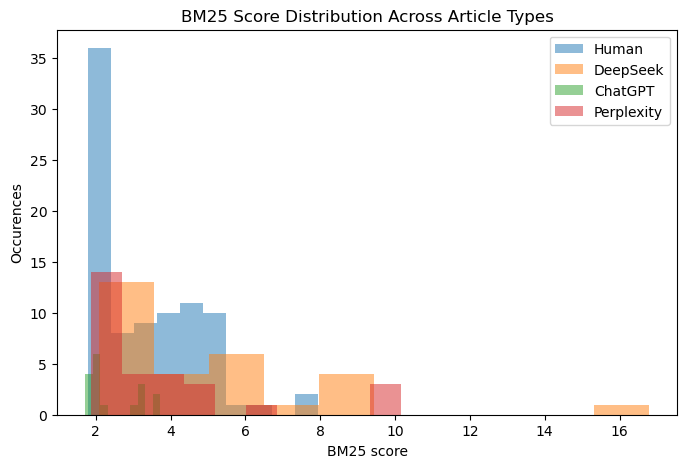

In [168]:
plt.figure(figsize=(8, 5))


nonzeroHuman = TFIDF.scoresHumanArticles[TFIDF.scoresHumanArticles > 0.5]
nonzeroDeepSeek = TFIDF.scoresDeepSeekArticles[TFIDF.scoresDeepSeekArticles > 0.5]
nonzeroChatGPT = TFIDF.scoresChatGPTArticles[TFIDF.scoresChatGPTArticles > 0.5]
nonzeroPerplexity = TFIDF.scoresPerplexityArticles[TFIDF.scoresPerplexityArticles > 0.5]

plt.hist(nonzeroHuman, bins=10, alpha=0.5, label="Human")
plt.hist(nonzeroDeepSeek, bins=10, alpha=0.5, label="DeepSeek")
plt.hist(nonzeroChatGPT, bins=10, alpha=0.5, label="ChatGPT")
plt.hist(nonzeroPerplexity, bins=10, alpha=0.5, label="Perplexity")
plt.xlabel("BM25 score")
plt.ylabel("Occurences")
plt.title("BM25 Score Distribution Across Article Types")
plt.legend()
plt.show()

### Boxplot


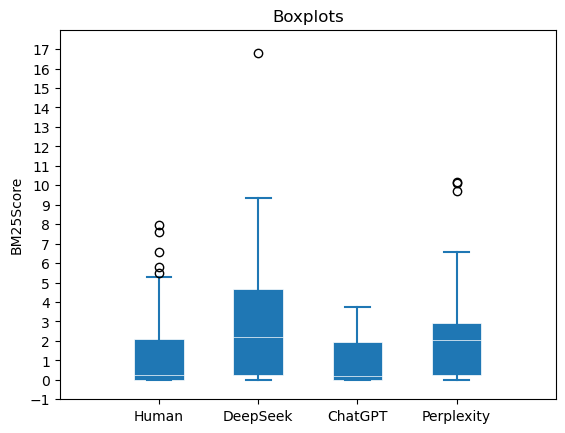

In [169]:
fig, ax = plt.subplots()

positions = [2,4,6,8]

VP = ax.boxplot([TFIDF.scoresHumanArticles, TFIDF.scoresDeepSeekArticles, TFIDF.scoresChatGPTArticles, TFIDF.scoresPerplexityArticles], positions = positions , widths=1, patch_artist=True, 
                showmeans=False, showfliers=True,
                medianprops={"color": "white", "linewidth": 0.5},
                boxprops={"facecolor": "C0", "edgecolor": "white",
                          "linewidth": 0.5},
                whiskerprops={"color": "C0", "linewidth": 1.5},
                capprops={"color": "C0", "linewidth": 1.5})

ax.set(xlim=(0, 10), xticks=np.arange(1, 10),
       ylim=(-1, 18), yticks=np.arange(-1, 18))

labels = ['Human', 'DeepSeek', 'ChatGPT', 'Perplexity']

ax.set_xticks(positions)
ax.set_xticklabels(labels)

ax.set_title('Boxplots')
plt.ylabel("BM25Score")

plt.show()

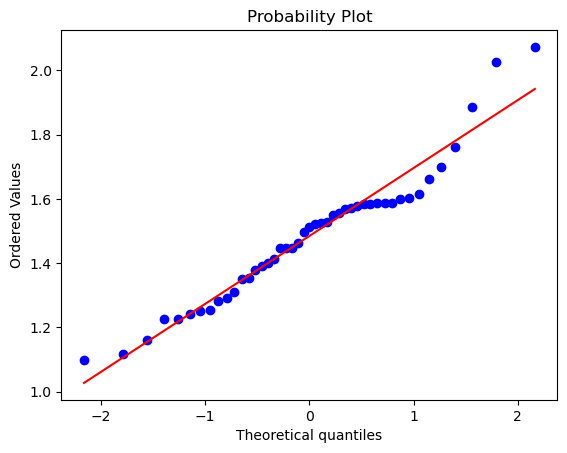

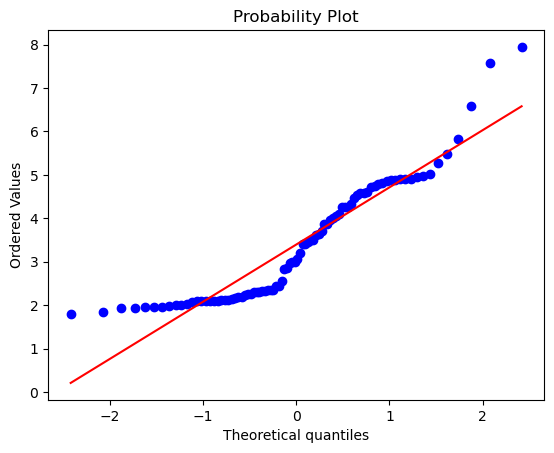

np.float64(0.4007220216606498)

In [170]:
nonzero = TFIDF.scoresHumanArticles[TFIDF.scoresHumanArticles > 3]
stats.probplot(np.log(nonzero), dist="norm", plot=plt)
plt.show()

nonzero = TFIDF.scoresHumanArticles[TFIDF.scoresHumanArticles > 0.5]
stats.probplot(nonzero, dist="norm", plot=plt)
plt.show()

zeros = np.sum(TFIDF.scoresHumanArticles == 0)
zero_fraction = zeros / len(TFIDF.scoresHumanArticles)
zero_fraction



# Statistik


### Confidence interval

In [171]:
epsilon = 1e-8
scoresHuman = np.array(TFIDF.scoresHumanArticles) + epsilon
scoresChatGPT = np.array(TFIDF.scoresChatGPTArticles) + epsilon
scoresDeepSeek = np.array(TFIDF.scoresDeepSeekArticles) + epsilon
scoresPerplexity = np.array(TFIDF.scoresPerplexityArticles) + epsilon

logHumanArticles = np.log(scoresHuman) + 9
logChatGPTArticles = np.log(scoresChatGPT) + 9
logDeepSeekArticles = np.log(scoresDeepSeek) + 9
logPerplexityArticles = np.log(scoresPerplexity) + 9

CIHuman = stats.t.interval(0.95, len(logHumanArticles)-1, loc=np.mean(logHumanArticles), scale=stats.sem(logHumanArticles))
CIDeepSeek = stats.t.interval(0.95, len(logChatGPTArticles)-1, loc=np.mean(logChatGPTArticles), scale=stats.sem(logChatGPTArticles))
CIChatGPT = stats.t.interval(0.95, len(logDeepSeekArticles)-1, loc=np.mean(logDeepSeekArticles), scale=stats.sem(logDeepSeekArticles))
CIPerplexity = stats.t.interval(0.95, len(logPerplexityArticles)-1, loc=np.mean(logPerplexityArticles), scale=stats.sem(logPerplexityArticles))
CIHuman,CIDeepSeek,CIChatGPT,CIPerplexity

((np.float64(0.5591909570654447), np.float64(2.713748898347212)),
 (np.float64(0.4381141836734721), np.float64(5.315026065726986)),
 (np.float64(2.7872762619237337), np.float64(7.532609546641178)),
 (np.float64(3.928526721170588), np.float64(8.136120263412025)))

### two sample t-test

In [175]:
HumanVSDeepseek = stats.ttest_ind(a=logHumanArticles, b=logDeepSeekArticles, equal_var=False)
HumanVSChatGPT = stats.ttest_ind(a=logHumanArticles, b=logChatGPTArticles, equal_var=False)
HumanVSPerplexity = stats.ttest_ind(a=logHumanArticles, b=logPerplexityArticles, equal_var=False)
float(HumanVSDeepseek.pvalue), float(HumanVSChatGPT.pvalue), float(HumanVSPerplexity.pvalue)

(0.008466693858297875, 0.35470973513677584, 0.0003711707034018141)

### Sample size


In [173]:
n = 1/4*(stats.norm.ppf(0.975)/0.05)**2
float(n)

384.14588206941244

### Percentage AI

In [174]:
AIThreshold = 2.1
Scores = TFIDF.scoresDeepSeekArticles
DetectedHuman = np.sum(Scores > AIThreshold)
DetectedHumanFraction = DetectedHuman/len(Scores)
DetectedHumanFraction

np.float64(0.54)